In [108]:
#Load the data
import pandas as pd 
data = pd.read_csv(r"C:\Users\rochi\OneDrive\Desktop\cancer\Breast_Cancer.csv")

In [109]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [110]:
data.shape

(4024, 16)

In [111]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [112]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4019    False
4020    False
4021    False
4022    False
4023    False
Length: 4024, dtype: bool

In [113]:
data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [114]:
data.nunique()

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

In [115]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


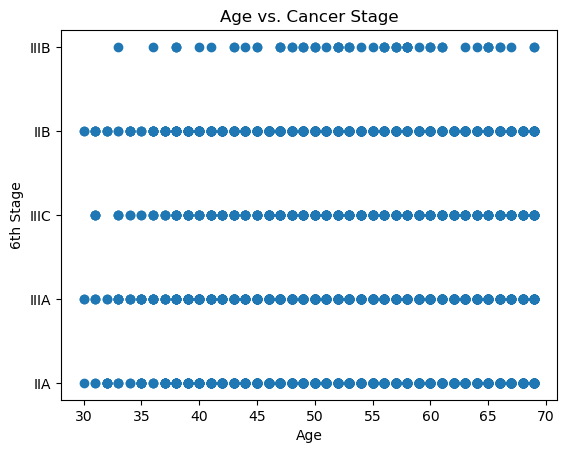

In [116]:
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(data['Age'], data['6th Stage'])
plt.xlabel('Age')
plt.ylabel('6th Stage')
plt.title('Age vs. Cancer Stage')
plt.show()

#The data points are grouped in horizontal clusters, indicating that patients of different ages fall into distinct cancer stages.
It appears that older and younger individuals can have both early (IIA) and late (IIIC) stages, suggesting age alone is not a strong determinant of cancer stage.
However, some clustering at higher ages in advanced stages (IIIB, IIIC) might suggest older individuals may be more prone to severe stages

#Possible Insights:
#No clear trend between Age and Cancer Stage:
#The distribution suggests that age does not directly determine cancer stage, as patients of all ages appear across different stages.
#Some clustering in advanced stages (IIIB, IIIC) among older individuals:
##This could indicate a higher likelihood of late-stage diagnosis in older patients.
#Younger patients are not limited to early-stage cancer:
#Some younger patients appear in IIIC, meaning aggressive cancer can develop at any age

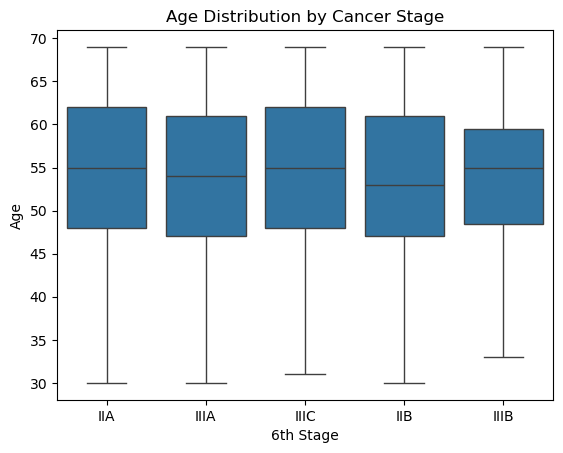

In [117]:
import seaborn as sns

# Box plot: Age vs. 6th Stage
sns.boxplot(x='6th Stage', y='Age', data=data)
plt.title('Age Distribution by Cancer Stage')
plt.show()

In [118]:
#checking if the age and cancer stage are significantly related.
import numpy as np
import scipy.stats as stats

#grouping the ages into bin
data['Age'] = pd.cut(data['Age'], bins = [30,40,50,60,70], labels=["30-40","40-50","50-60","60-70"])

#creating a contingency table 
contingency_table = pd.crosstab(data['Age'],data['6th Stage'])

#performing the chi-square test

chi2,p,dof,expected = stats.chi2_contingency(contingency_table)

print("Chi-square Statistics:", chi2)
print("P-Value:", p)

#Interpretation

if  p < 0.05:
    print("Age and Cancer stage are significantly associated (Rejected Null Hypothesis)")

else:
    print("No significant association between Age and Cancer Stage.")

Chi-square Statistics: 26.073206047979706
P-Value: 0.010480762465004378
Age and Cancer stage are significantly associated (Rejected Null Hypothesis)


The output shows that Age and Cancer Stage are significantly related.

In [119]:
print(data.dtypes)

Age                       category
Race                        object
Marital Status              object
T Stage                     object
N Stage                     object
6th Stage                   object
differentiate               object
Grade                       object
A Stage                     object
Tumor Size                   int64
Estrogen Status             object
Progesterone Status         object
Regional Node Examined       int64
Reginol Node Positive        int64
Survival Months              int64
Status                      object
dtype: object


Age


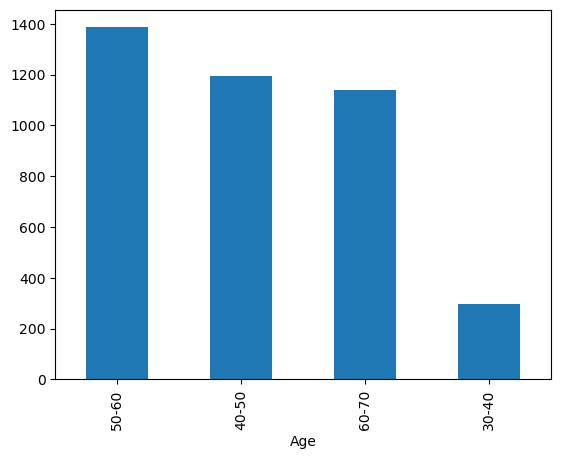

Race


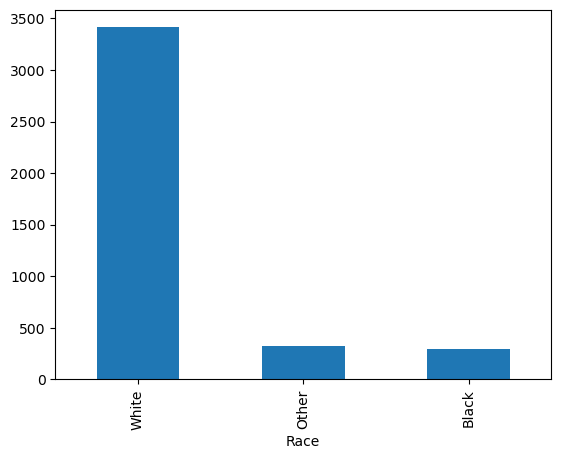

Marital Status


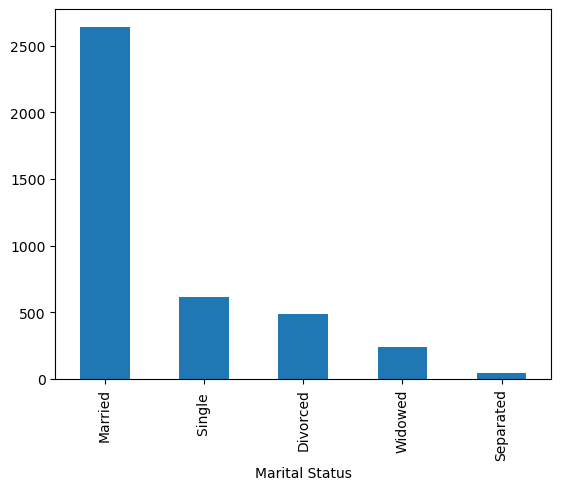

T Stage 


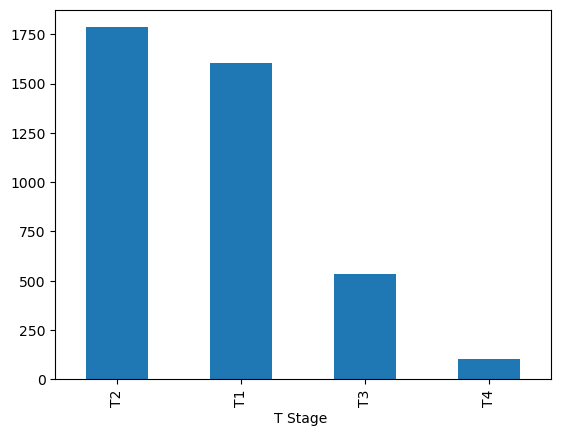

N Stage


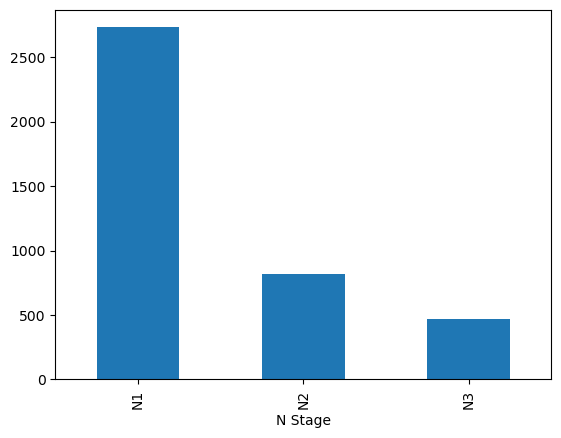

6th Stage


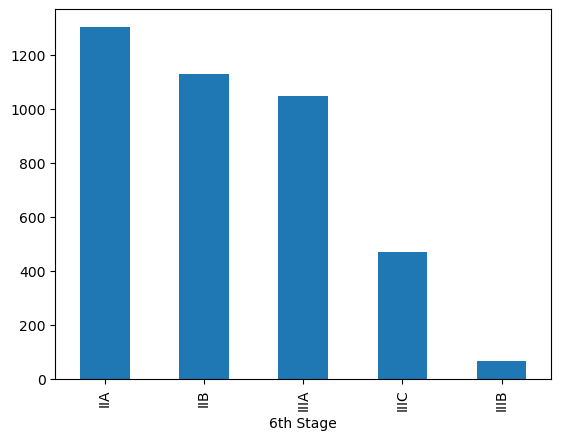

differentiate


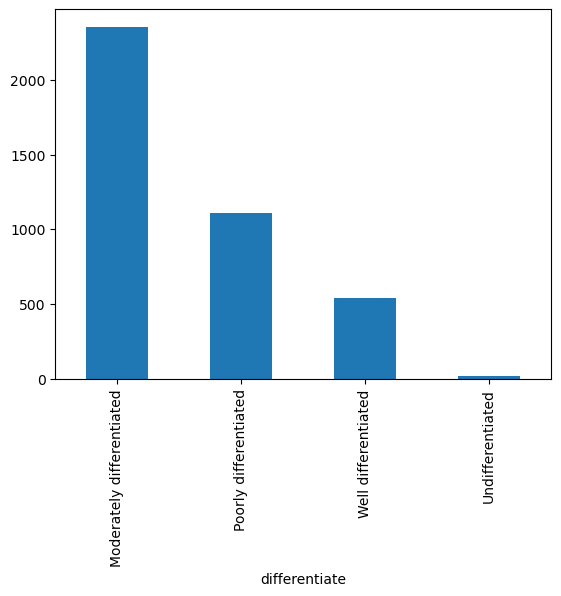

Grade


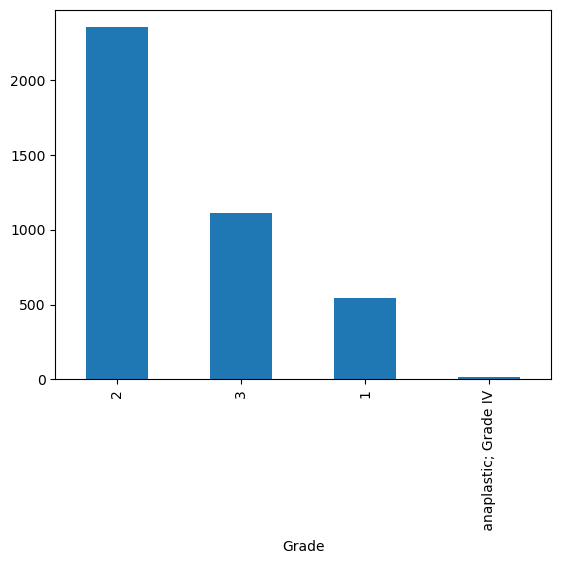

A Stage


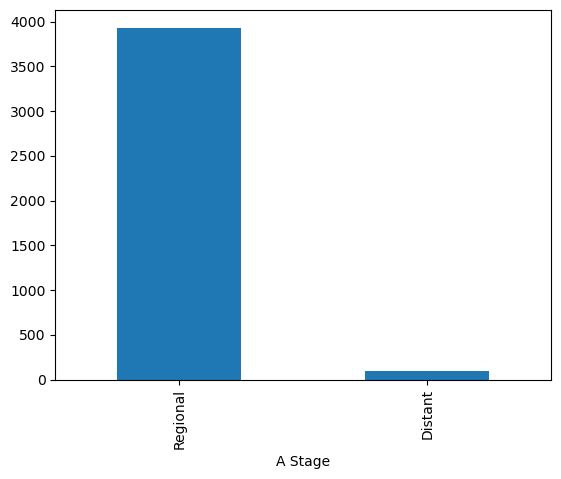

Tumor Size


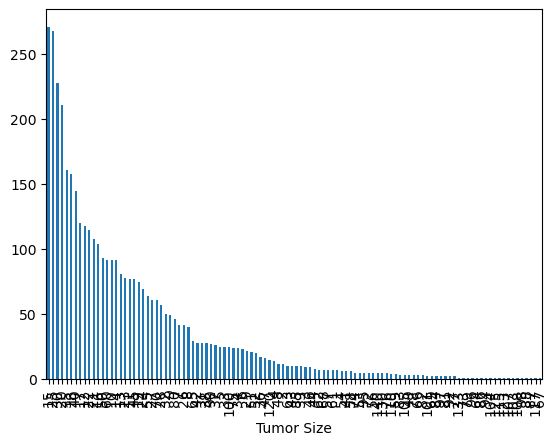

Estrogen Status


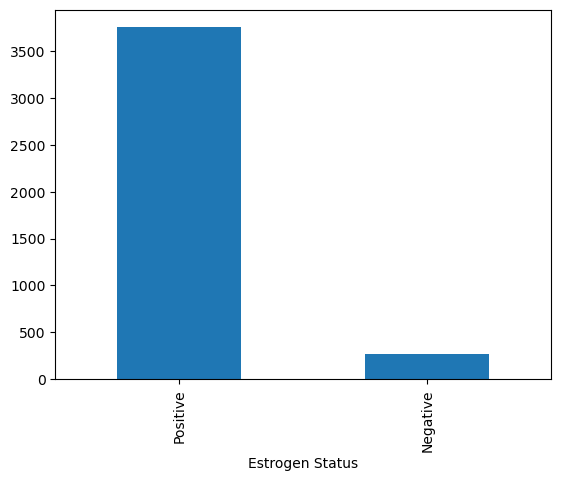

Progesterone Status


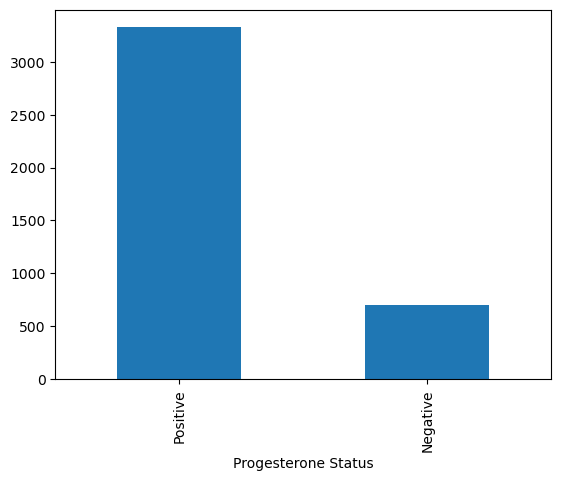

Regional Node Examined


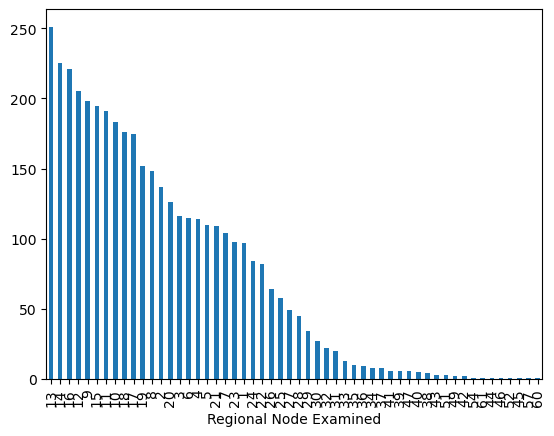

Reginol Node Positive


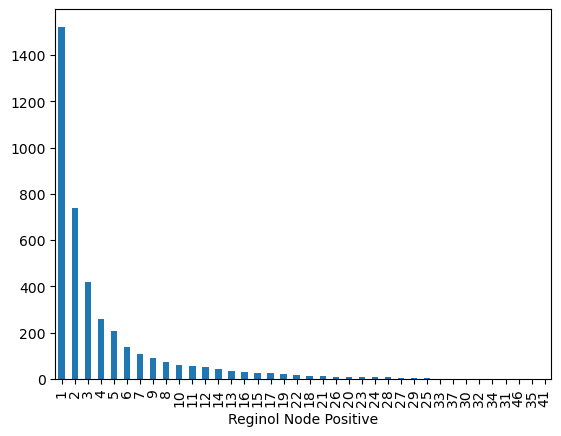

Survival Months


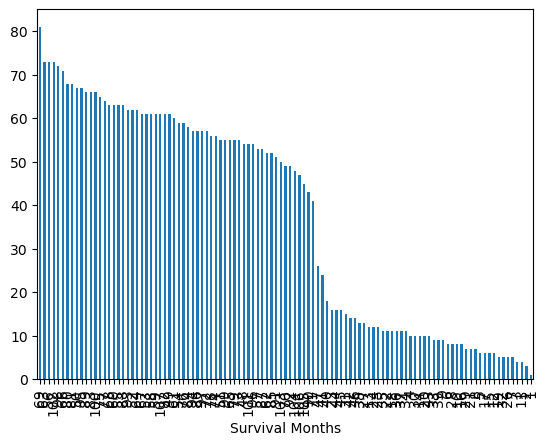

Status


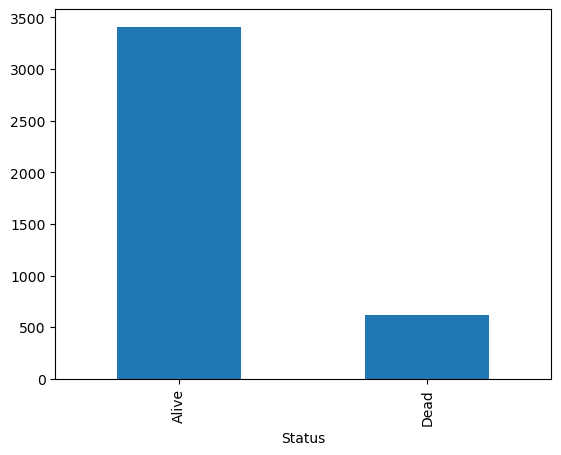

In [120]:
for col in data.columns:
    data[col].value_counts().plot.bar()
    print(col)
    plt.show()

In [121]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [125]:
grouped_data = data.groupby(['Age']).agg({
    'Tumor Size': ['mean', 'min', 'max', 'std'],
    'Regional Node Examined': ['mean', 'min', 'max', 'std'],
    'Reginol Node Positive': ['mean', 'min', 'max', 'std'],
    'Survival Months': ['mean', 'min', 'max', 'std']
})

grouped_data.columns = ["_".join(x) for x in grouped_data.columns.ravel()]
grouped_data = grouped_data.reset_index()

C:\Users\rochi\AppData\Local\Temp\ipykernel_22268\868461552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Age']).agg({


In [126]:
import os

# Create directory if it doesn't exist
os.makedirs("cancer", exist_ok=True)

# Now save the file
data.to_csv(r"C:\Users\rochi\OneDrive\Desktop\cancer\step1_cleanCancer.csv", index=False)